(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


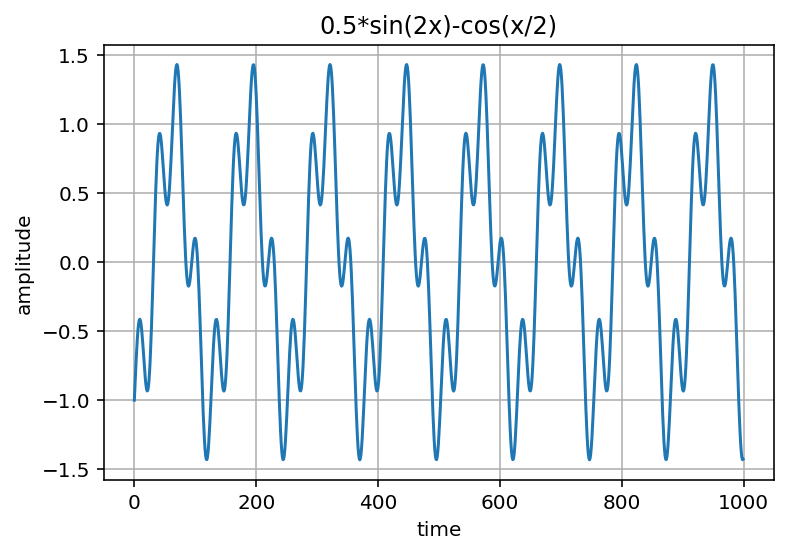

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [4]:
w = 20
h = 1

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [3]:
def seq2dataset(seq, window, horizon):
    X= []
    Y=[]
    
    for i in range(len(seq) - (window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        
        X.append(x)
        Y.append(y)
        
    return np.array(X), np.array(Y)

In [5]:
split_ratio = 0.8

split = int(split_ratio * len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [9]:
model = Sequential()

model.add(SimpleRNN(units=128,
                   activation='tanh',
                   input_shape=(20,1)))

model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
from datetime import datetime

start_time = datetime.now()
hist=model.fit(x_train,y_train,epochs=100, validation_data=(x_test, y_test))
end_time=datetime.now()
print('Elapsed Time =>', end_time)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train,
          validation_data = (x_test, y_test),
          epochs=100, batch_size=16,
          callbacks=[early_stop])

Epoch 1/100
49/49 [==============================] - 1s 16ms/step - loss: 2.5716e-04 - mae: 0.0125 - val_loss: 2.8558e-04 - val_mae: 0.0133
Epoch 2/100
49/49 [==============================] - 1s 19ms/step - loss: 1.9471e-04 - mae: 0.0106 - val_loss: 8.8328e-05 - val_mae: 0.0071
Epoch 3/100
49/49 [==============================] - 1s 14ms/step - loss: 5.0442e-05 - mae: 0.0056 - val_loss: 9.9183e-06 - val_mae: 0.0027
Epoch 4/100
49/49 [==============================] - 1s 16ms/step - loss: 1.6302e-05 - mae: 0.0031 - val_loss: 8.2379e-06 - val_mae: 0.0023
Epoch 5/100
49/49 [==============================] - 1s 17ms/step - loss: 1.8824e-05 - mae: 0.0034 - val_loss: 1.3586e-05 - val_mae: 0.0031
Epoch 6/100
49/49 [==============================] - 1s 16ms/step - loss: 8.5166e-06 - mae: 0.0023 - val_loss: 1.1720e-05 - val_mae: 0.0029
Epoch 7/100
49/49 [==============================] - 1s 16ms/step - loss: 1.3543e-05 - mae: 0.0028 - val_loss: 1.3901e-05 - val_mae: 0.0030
Epoch 8/100
49/49 [=

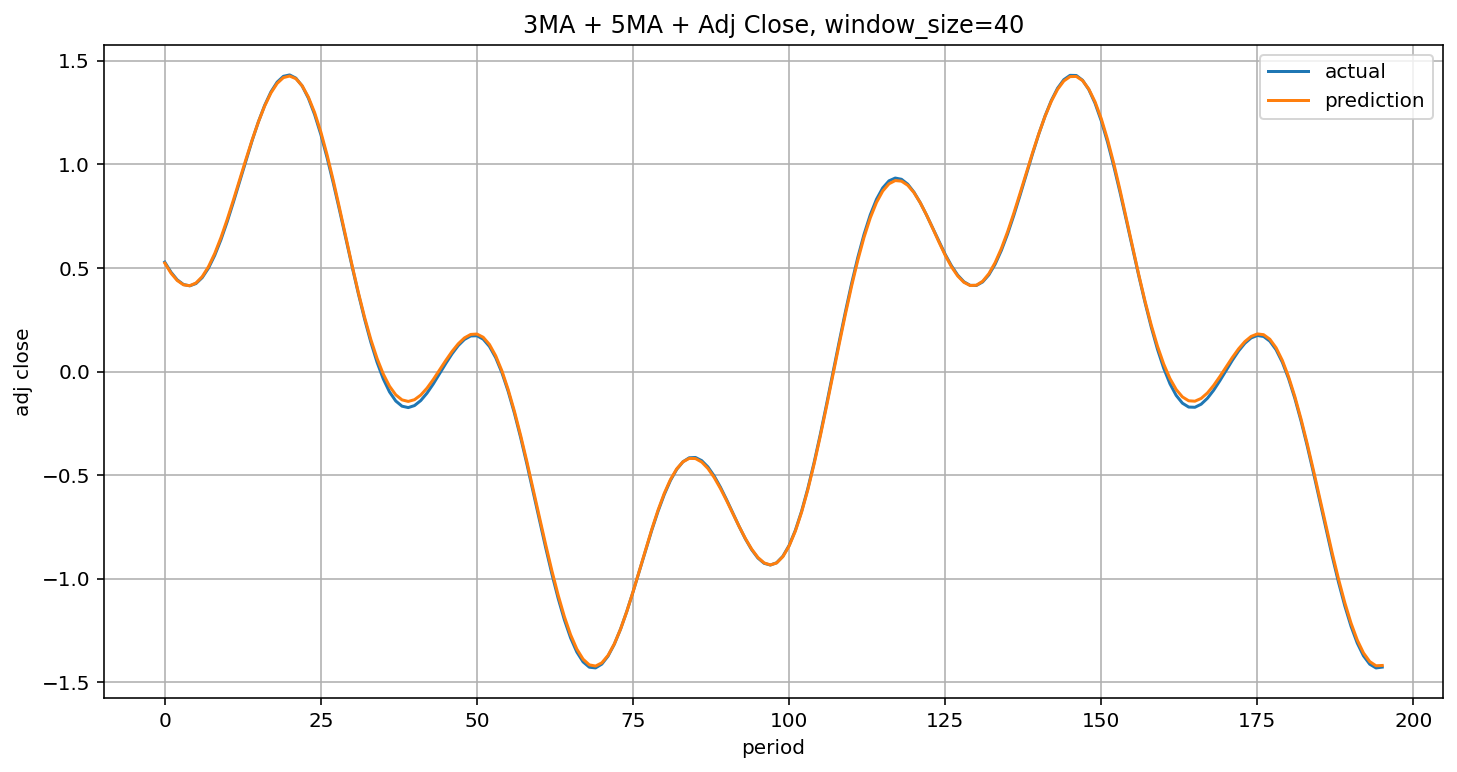

In [15]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')
plt.show()

In [17]:
pred = model.predict(x_test)

print(pred.shape)

(196, 1)


In [18]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ', rand_idx, '\n')

print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)

print('\n\nrandom idx = ', rand_idx, '\n')

print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [161 161  80 177 192] 

pred =  [-0.04129924 -0.04129924 -0.6208331   0.13821648 -1.3871961 ]
label =  [-0.05905373 -0.05905373 -0.59397023  0.14653515 -1.37256468]


random idx =  [ 93 120  77 168 149] 

pred =  [-0.8288277   0.8699493  -0.89074415 -0.09332133  1.3120711 ]
label =  [-0.80823254  0.8657532  -0.86395236 -0.09033242  1.29524644]


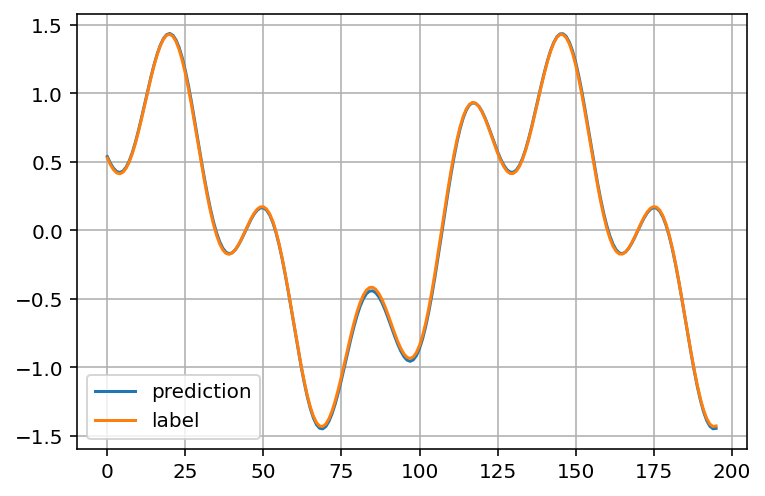

In [19]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()